# Exercise 6


## 1
Show that the Hadamard gate can be written in the following two forms

$$H = \frac{X+Z}{\sqrt{2}} \sim \exp\left(i \frac{\pi}{2} \, \frac{X+Z}{\sqrt{2}}\right).$$

Here $\sim$ is used to denote that the equality is valid up to a global phase, and hence that the resulting gates are physically equivalent.

Hint: it might even be easiest to prove that $e^{i\frac{\pi}{2} M} \sim M$ for any matrix whose eigenvalues are all $\pm 1$, and that such matrices uniquely satisfy $M^2=I$.

$$\frac{X+Z}{\sqrt2} = \frac1{\sqrt2}\left(\begin{pmatrix}0&&1\\1&&0\end{pmatrix}+\begin{pmatrix}1&&0\\0&&-1\end{pmatrix}\right)=\frac1{\sqrt2}\begin{pmatrix}1&&1\\1&&-1\end{pmatrix}=H$$
Because $\frac{X+Z}{\sqrt2} = H$ and $H² = \mathbb{I}$: $$\exp\left(i \frac{\pi}{2} \, \frac{X+Z}{\sqrt{2}}\right) = \cos(\frac\pi 2) + i \sin(\frac\pi 2)\frac{X+Z}{\sqrt{2}} = iH \sim H$$

## 2

The Hadamard can be constructed from `rx` and `rz` operations as

$$ R_x(\theta) = e^{i\frac{\theta}{2} X}, ~~~ R_z(\theta) = e^{i\frac{\theta}{2} Z},\\ H \equiv \lim_{n\rightarrow\infty} \left( ~R_x\left(\frac{\theta}{n}\right) ~~R_z \left(\frac{\theta}{n}\right) ~\right)^n.$$

For some suitably chosen $\theta$. When implemented for finite $n$, the resulting gate will be an approximation to the Hadamard whose error decreases with $n$.

The following shows an example of this implemented with Qiskit with an incorrectly chosen value of $\theta$ (and with the global phase ignored).

* Determine the correct value of $\theta$.

* Show that the error (when using the correct value of $\theta$) decreases quadratically with $n$.

a) Because of Trotter-Suzuki-Method: $$  H \equiv \lim_{n\rightarrow\infty} \left( ~R_x\left(\frac{\theta}{n}\right) ~~R_z \left(\frac{\theta}{n}\right) ~\right)^n = e^{i \frac{\theta}2 (X+Z)}$$
Therefore we have to find a $\theta$ such that: $$e^{i \frac{\theta}2 (X+Z)} = e^{i \frac\pi2\frac{X+Z}{\sqrt2}}$$
Using elementary transformations we conclude: $$\theta = \frac\pi{\sqrt2}$$

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np

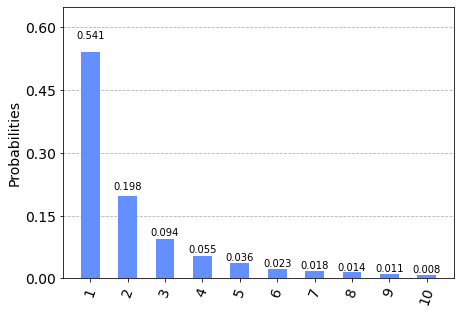

In [2]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

error = {}
for n in range(1,11):

    # Create a blank circuit
    qc = QuantumCircuit(q,c)
    
    # Implement an approximate Hadamard
    theta = np.pi/np.sqrt(2)
    for j in range(n):
        qc.rx(theta/n,q[0])
        qc.rz(theta/n,q[0])
      
    # We need to measure how good the above approximation is. Here's a simple way to do this.
    # Step 1: Use a real hadamard to cancel the above approximation.
    # For a good approximatuon, the qubit will return to state 0. For a bad one, it will end up as some superposition.
    qc.h(q[0])
    
    # Step 2: Run the circuit, and see how many times we get the outcome 1.
    # Since it should return 0 with certainty, the fraction of 1s is a measure of the error.
    qc.measure(q,c)
    shots = 20000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    try:
        error[n] = (job.result().get_counts()['1']/shots)
    except:
        pass

plot_histogram(error)

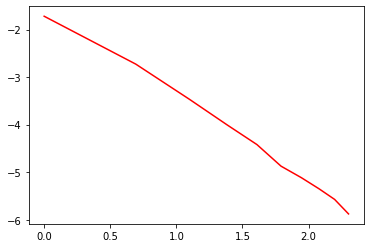

In [3]:
import matplotlib.pyplot as plt

y =np.array([np.log(x) for x in error.values()])

x = np.array([np.log(x) for x in range(1, len(error)+1)])

fig = plt.figure()
plt.plot(x,y, 'r')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
x = x.reshape((-1,1))
regression = LinearRegression().fit(x,y)
print("R²  =", regression.score(x,y)) # Could this be used to measure the error on a QC, as it should theoretically be linear?
slope = regression.coef_
print('slope:', slope)

R²  = 0.9954931793424693
slope: [-1.82260456]


In [5]:
from IPython.display import Markdown as md

md("As we know that the error scales in a Trotter-Suzuki-Approximation scales polynomially to the number of repetions, we can find the exponent by plotting the $\\log(\\text{error})$ vs. $\\log({n})$ and calculating the slope to being $%e$, we can quite safely assume, that $\\text{error} \propto{n^{%s}}$"%(slope,round(slope[0],3)))

As we know that the error scales in a Trotter-Suzuki-Approximation scales polynomially to the number of repetions, we can find the exponent by plotting the $\log(\text{error})$ vs. $\log({n})$ and calculating the slope to being $-1.822605e+00$, we can quite safely assume, that $\text{error} \propto{n^{-1.823}}$

## 3

An improved version of the approximation can be found from,

$$H \equiv \lim_{n\rightarrow\infty} \left( ~ R_z \left(\frac{\theta}{2n}\right)~~ R_x\left(\frac{\theta}{n}\right) ~~ R_z \left(\frac{\theta}{2n}\right) ~\right)^n.$$

Implement this, and investigate the scaling of the error.

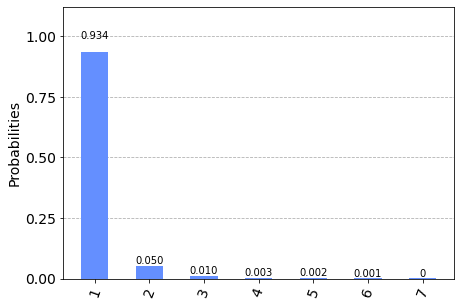

In [6]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

error = {}
for n in range(1,11):

    # Create a blank circuit
    qc = QuantumCircuit(q,c)
    
    # Implement an approximate Hadamard
    theta = np.pi/np.sqrt(2)
    for j in range(n):
        qc.rz(theta/(2*n),q[0])
        qc.rx(theta/n,q[0])
        qc.rz(theta/(2*n),q[0])
      
    # We need to measure how good the above approximation is. Here's a simple way to do this.
    # Step 1: Use a real hadamard to cancel the above approximation.
    # For a good approximatuon, the qubit will return to state 0. For a bad one, it will end up as some superposition.
    qc.h(q[0])
    
    # Step 2: Run the circuit, and see how many times we get the outcome 1.
    # Since it should return 0 with certainty, the fraction of 1s is a measure of the error.
    qc.measure(q,c)
    shots = 20000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    try:
        error[n] = (job.result().get_counts()['1']/shots)
    except:
        pass
        
plot_histogram(error)

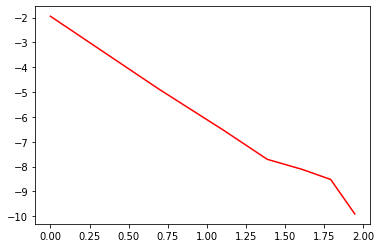

In [7]:
import matplotlib.pyplot as plt

y =np.array([np.log(x) for x in error.values()])

x = np.array([np.log(x) for x in range(1, len(error)+1)])

fig = plt.figure()
plt.plot(x,y, 'r')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
x = x.reshape((-1,1))
regression = LinearRegression().fit(x,y)
print("R²  =", regression.score(x,y)) # Could this be used to measure the error on a QC, as it should theoretically be linear?
slope =  regression.coef_
print('slope:', slope)

R²  = 0.9882314175693323
slope: [-3.86024307]


In [9]:
from IPython.display import Markdown as md

md("As we know that the error scales in a Trotter-Suzuki-Approximation scales polynomially to the number of repetions, we can find the exponent by plotting the $\\log(\\text{error})$ vs. $\\log({n})$ and calculating the slope to being $%e$, we can quite safely assume, that $\\text{error} \propto{n^{%s}}$"%(slope,round(slope[0],3)))

As we know that the error scales in a Trotter-Suzuki-Approximation scales polynomially to the number of repetions, we can find the exponent by plotting the $\log(\text{error})$ vs. $\log({n})$ and calculating the slope to being $-3.860243e+00$, we can quite safely assume, that $\text{error} \propto{n^{-3.86}}$

## 4

Write a circuit to implement the following unitary with perfect precision, using only `rx`, `rz` and Clifford gates

$$U = \exp\left[i \frac{\theta}{2} \, \left( X\otimes X + Z\otimes Z \right) \right].$$

Apply this to the initial state $|10\rangle$ and determine the final state for the following values of $\theta$.

* (a) $\theta=\pi/4 $
* (b) $\theta=\pi/2 $
* (c) $\theta=\pi $

You can use the following as a starting point.

Because $(X \otimes X$ and $(Z \otimes Z)$ are commutative, so $(X \otimes X)(Z \otimes Z) =(Z \otimes Z) (X \otimes X)$: $$U = \exp\left[i \frac{\theta}{2} \, \left( X\otimes X + Z\otimes Z \right) \right] = \exp \left[i \frac \theta 2 X\otimes X\right] \exp\left[i \frac \theta 2 Z\otimes Z\right]$$

Because $C_X (R_X(\theta)\otimes I) C_X = exp\left[i \frac\theta 2 C_X  X \otimes I C_X\right] = \exp \left[i \frac \theta 2 X\otimes X\right]$: $$ U = \exp \left[i \frac \theta 2 X\otimes X\right] \exp\left[i \frac \theta 2 X\otimes Z\right] =C_X (R_X(\theta)\otimes I) C_X  \exp\left[i \frac \theta 2 Z\otimes Z\right]$$

Becazse $C_X (R_X(\theta) \otimes I) C_X = \exp \left[i \frac \theta 2 X\otimes X\right]$ and  $(H \otimes H) \exp \left[i \frac \theta 2 X\otimes X\right] (H \otimes H) = \exp \left[i \frac \theta 2(H \otimes H) (X\otimes X) (H \otimes H)\right] = \exp \left[i \frac \theta 2 Z\otimes Z\right]$, so $\exp \left[i \frac \theta 2 Z\otimes Z\right] = (H \otimes H)C_X(R_X\otimes I) C_X(H \otimes H)$:

$$ U = C_X(R_X\otimes I) C_X(H \otimes H)C_X(R_X\otimes I) C_X(H \otimes H)$$


In [10]:
from qiskit.visualization import array_to_latex, plot_bloch_multivector
statevectors = []
for i in range(2, -1, -1):
    q = QuantumRegister(2)

    theta = np.pi/(2**i)
    # Create a blank circuit
    qc = QuantumCircuit(q)

    # prepare the |10> state
    qc.x(1)

    qc.cx(1,0)
    qc.rx(theta,1)
    qc.cx(1,0)
    qc.h(1)
    qc.h(0)
    qc.cx(1,0)
    qc.rx(theta, 1)
    qc.cx(1,0)
    qc.h(1)
    qc.h(0)

    # get the final statevector
    job = Aer.get_backend('statevector_simulator').run(qc)
    result = job.result()
    statevectors.append(result.get_statevector()) 

In [11]:
array_to_latex(statevectors[0], prefix="\\text{a) State with } \\theta = \\frac \\pi4 \\text{: }")

<IPython.core.display.Latex object>

In [12]:
array_to_latex(statevectors[1], prefix="\\text{b) State with } \\theta = \\frac \\pi2 \\text{: }")

<IPython.core.display.Latex object>

In [13]:
array_to_latex(statevectors[2], prefix="\\text{c) State with } \\theta = \\pi \\text{: }")

<IPython.core.display.Latex object>

Another idea that might work is that $e^{i \frac\theta2 P_0} \otimes P_1 = e^{i \frac\theta2 P_0 \otimes P_1}$ Therefore $$e^{i \frac\theta2 X \otimes X} = e^{i \frac\theta2 X} \otimes X = R_X(\theta)\otimes X$$ and $$e^{i \frac\theta2 Z \otimes Z} = e^{i \frac\theta2 Z} \otimes Z = R_Z(\theta)\otimes Z$$

Applying this circuit does give slightly different results though:

In [14]:
from qiskit.visualization import array_to_latex, plot_bloch_multivector
theta = np.pi
statevectors = []
for i in range(2, -1, -1):
    q = QuantumRegister(2)

    # Create a blank circuit
    qc = QuantumCircuit(q)

    # prepare the |10> state
    qc.x(1)

    qc.rx(theta/(2**i), 0)
    qc.x(1)
    qc.rz(theta/(2**i), 0)
    qc.z(1)

    # get the final statevector
    job = Aer.get_backend('statevector_simulator').run(qc)
    result = job.result()
    statevectors.append(result.get_statevector()) 

In [15]:
array_to_latex(statevectors[0])

<IPython.core.display.Latex object>

In [16]:
array_to_latex(statevectors[1])

<IPython.core.display.Latex object>

In [17]:
array_to_latex(statevectors[2])

<IPython.core.display.Latex object>

## 5. Effects of garbage in quantum circuits

The CX gate performs the mapping 
$(i,j) \rightarrow (i,i+j \mod 2)$ from an input on two bits to an output on two bits.

It is interesting to note (though not relevant to the problem) that this mapping is not of the form $(z,0) \rightarrow (z,f(z))$, as considered last week, since the function $f(i,j) = i+j \mod 2$ does not require the whole input to be present for reversibility.

Here are two circuits with a CX gate.

![](circuits.png)

* (a) The first circuit is composed of both a quantum part and an irreversible classical part. Determine the final output bit .

* (b) Show that the second circuit effectively acts as a CX between the first and third qubits, but with the additional effect of producting a garbage qubit on the second.

* (c) Replace the true CX in the first circuit with the garbage producing one from the second. Show that this changes the output bit.

* (d) Show how the garbage producing CX can be corrected by uncomputation.

a) 

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$

| Stage  | Statevector of the system |
|---|---|
| After Z on $Q_0$ and X on $Q_1$  | $\frac 1 {\sqrt2} \begin{pmatrix}0\\0\\0\\0\\1\\-1\\0\\0\end{pmatrix}$ |
| After CNOT controlled on $Q_0$ and targetted on $Q_2$  |  $\frac 1 {\sqrt2} \begin{pmatrix}0\\-1\\0\\0\\1\\0\\0\\0\end{pmatrix}$  |
| After H on $Q_0$ and on $Q_2$  |  $\frac 1 {\sqrt2} \begin{pmatrix}0\\1\\0\\0\\-1\\0\\0\\0\end{pmatrix}$  |

As the only possible outcomes are 0 on $Q_0$ and 1 on $Q_2$, or 1 on $Q_0$ and 0 on $Q_2$, the only possible outcome for the XOR at the end is 1.


b) To show that the circuit behaves like a CNOT with some garbage, I am going to show each possible case individually: 

With $Q_0 = \ket 0$ and $Q_2 = \ket 0$:  

| Stage  | $Q_0$ | $Q_1$ | $Q_2$ |
|---|---|---|---|
| Start | $\ket0$ | $\ket0$  | $\ket0$ |
| After first $C_X$ | $\ket0$ | $\ket0$  | $\ket0$ |
| After second $C_X$ | $\ket0$ | $\ket0$  | $\ket0$ |

With $Q_0 = \ket 1$ and $Q_2 = \ket 0$:  

| Stage  | $Q_0$ | $Q_1$ | $Q_2$ |
|---|---|---|---|
| Start | $\ket1$ | $\ket0$  | $\ket0$ |
| After first $C_X$ | $\ket1$ | $\ket1$  | $\ket0$ |
| After second $C_X$ | $\ket1$ | $\ket1$  | $\ket1$ |

With $Q_0 = \ket 0$ and $Q_2 = \ket 1$:  

| Stage  | $Q_0$ | $Q_1$ | $Q_2$ |
|---|---|---|---|
| Start | $\ket0$ | $\ket0$  | $\ket1$ |
| After first $C_X$ | $\ket0$ | $\ket0$  | $\ket1$ |
| After second $C_X$ | $\ket0$ | $\ket0$  | $\ket1$ |

With $Q_0 = \ket 1$ and $Q_2 = \ket 1$:  

| Stage  | $Q_0$ | $Q_1$ | $Q_2$ |
|---|---|---|---|
| Start | $\ket1$ | $\ket0$  | $\ket1$ |
| After first $C_X$ | $\ket1$ | $\ket1$  | $\ket1$ |
| After second $C_X$ | $\ket0$ | $\ket1$  | $\ket0$ |

So this circuit acts as a CNOT between the qubits $Q_0$ and $Q_2$, with the sideffect of mirroring the state of $Q_0$ on $Q_1$.


c) Replacing CX(0,2) with CX(0,1)CX(1,2):

| Stage  | Statevector of the system |
|---|---|
| After Z on $Q_0$ and X on $Q_1$  | $\frac 1 {\sqrt2} \begin{pmatrix}0\\0\\0\\0\\1\\-1\\0\\0\end{pmatrix}$ |
| After CNOT controlled on $Q_0$ and targetted on $Q_2$  |  $\frac 1 {\sqrt2}  \begin{pmatrix}0\\0\\0\\-1\\1\\0\\0\\0\end{pmatrix}$  |
| After H on $Q_0$ and on $Q_2$  |  $\frac 1 {\sqrt2} \begin{pmatrix}0\\0\\0\\-1\\1\\0\\0\\0\end{pmatrix}$  |

Using these results we can see that we either get $\ket {100}$ or $\ket {101}$ each with a probability of $\frac12$, thus the output of the XOR at the end is either a $1$ or a $0$ 50% of the time.

d) By adding a CNOT controlled on $Q_0$ and targeted on $Q_1$ after the second CNOT, we can solve this problem and end up with the same statevector at the end. This is the circuit I ended up with:

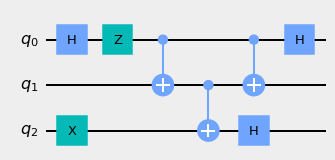